In [4]:
# Dans une cellule du notebook :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
runners_df = pd.read_csv('../data/processed/runners_profiles.csv')
sessions_df = pd.read_csv('../data/processed/training_sessions.csv')

print(f"🏃‍♂️ {len(runners_df)} coureurs analysés !")
print(f"🏋️‍♂️ {len(sessions_df)} séances d'entraînement !")

🏃‍♂️ 200 coureurs analysés !
🏋️‍♂️ 11957 séances d'entraînement !


/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


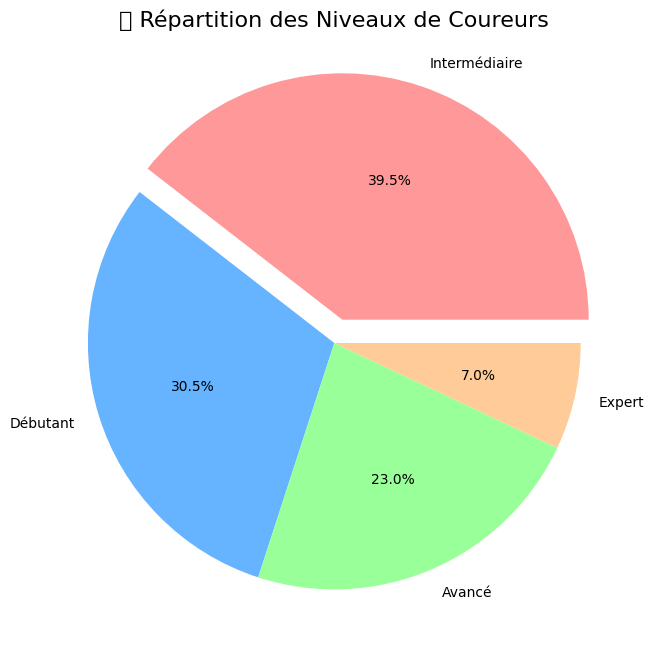

In [5]:
# 1. Graphique en secteurs animé
plt.figure(figsize=(10, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
runners_df['niveau'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                         colors=colors, explode=(0.1, 0, 0, 0))
plt.title('🏆 Répartition des Niveaux de Coureurs', fontsize=16)
plt.ylabel('')
plt.show()

/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


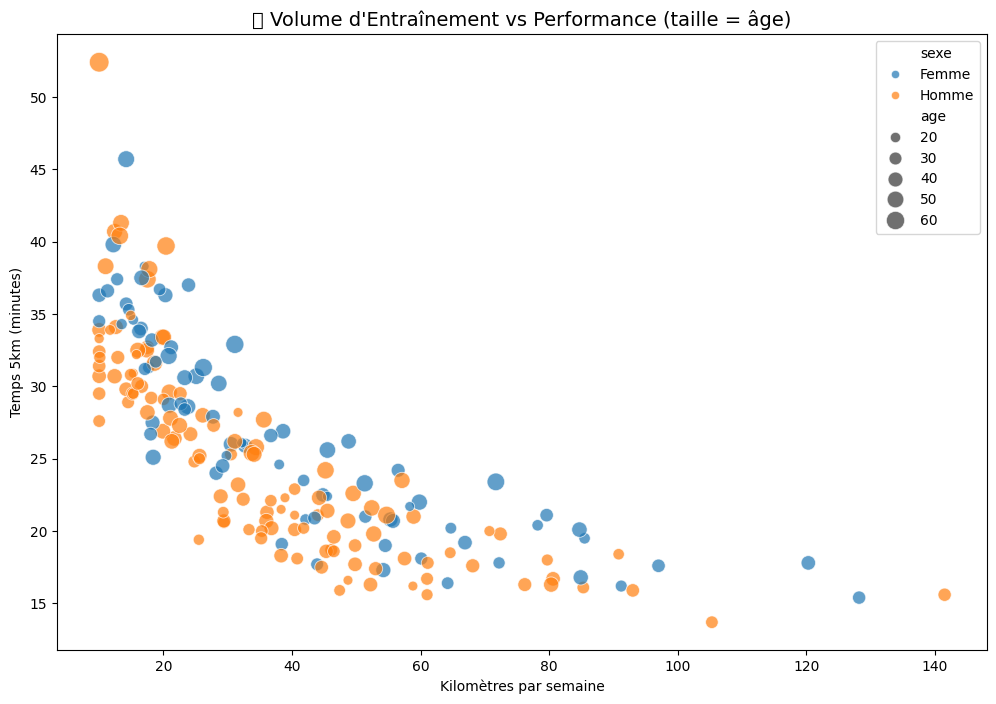

In [6]:
# 2. Graphique de corrélation stylé
plt.figure(figsize=(12, 8))
sns.scatterplot(data=runners_df, x='km_semaine', y='temps_5km', 
                hue='sexe', size='age', sizes=(50, 200), alpha=0.7)
plt.title('🎯 Volume d\'Entraînement vs Performance (taille = âge)', fontsize=14)
plt.xlabel('Kilomètres par semaine')
plt.ylabel('Temps 5km (minutes)')
plt.show()

/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


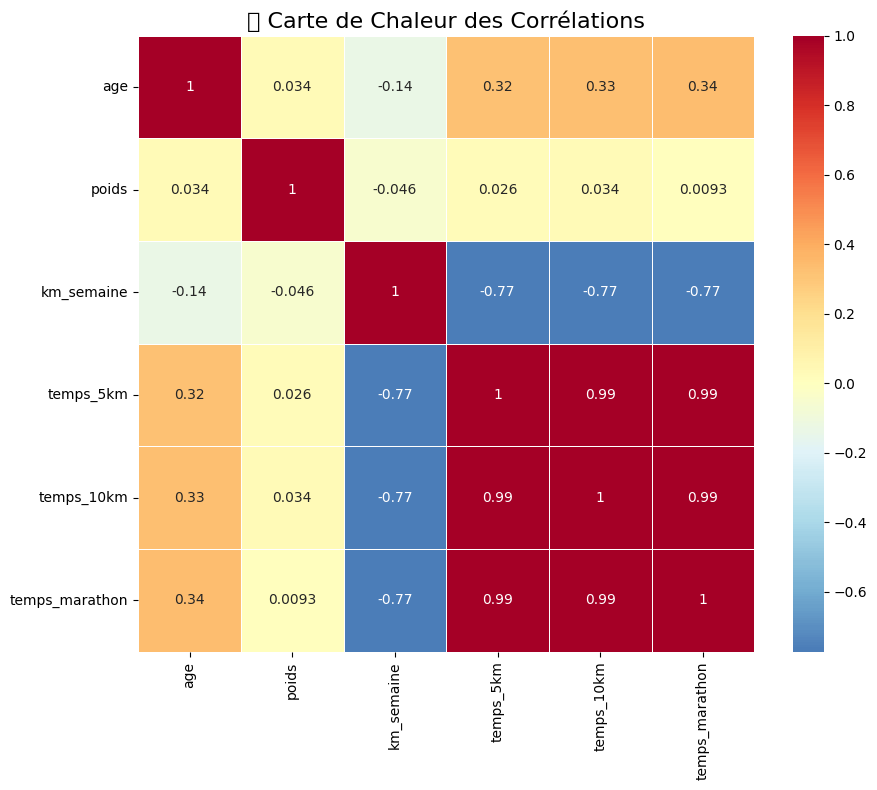

In [7]:
# 3. Heatmap des corrélations
plt.figure(figsize=(10, 8))
corr_vars = ['age', 'poids', 'km_semaine', 'temps_5km', 'temps_10km', 'temps_marathon']
corr_matrix = runners_df[corr_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5)
plt.title('🔥 Carte de Chaleur des Corrélations', fontsize=16)
plt.show()

In [8]:
# 1. Trouver les coureurs les plus rapides
top_runners = runners_df.nsmallest(5, 'temps_5km')[['runner_id', 'niveau', 'sexe', 'temps_5km', 'km_semaine']]
print("🏆 TOP 5 DES COUREURS LES PLUS RAPIDES AU 5KM:")
print(top_runners)

🏆 TOP 5 DES COUREURS LES PLUS RAPIDES AU 5KM:
    runner_id  niveau   sexe  temps_5km  km_semaine
15       R016  Expert  Homme       13.7       105.3
41       R042  Expert  Femme       15.4       128.2
2        R003  Avancé  Homme       15.6        61.0
84       R085  Expert  Homme       15.6       141.5
170      R171  Expert  Homme       15.9        93.0


In [9]:
# 2. Analyser votre profil personnel
mon_age = 21 
mon_sexe = 'Homme'
mon_niveau = 'Intermédiaire'  # Débutant/Intermédiaire/Avancé/Expert

# Filtrer les coureurs similaires
coureurs_similaires = runners_df[
    (runners_df['age'].between(mon_age-5, mon_age+5)) & 
    (runners_df['sexe'] == mon_sexe) & 
    (runners_df['niveau'] == mon_niveau)
]

print(f"👥 {len(coureurs_similaires)} coureurs similaires à votre profil:")
print(f"⏱️ Temps moyen 5km: {coureurs_similaires['temps_5km'].mean():.1f} minutes")
print(f"🏃‍♂️ Volume moyen: {coureurs_similaires['km_semaine'].mean():.1f} km/semaine")

👥 6 coureurs similaires à votre profil:
⏱️ Temps moyen 5km: 23.2 minutes
🏃‍♂️ Volume moyen: 34.0 km/semaine


🎯 Avec 25km/semaine, votre temps 5km prédit: 28.5 minutes


/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


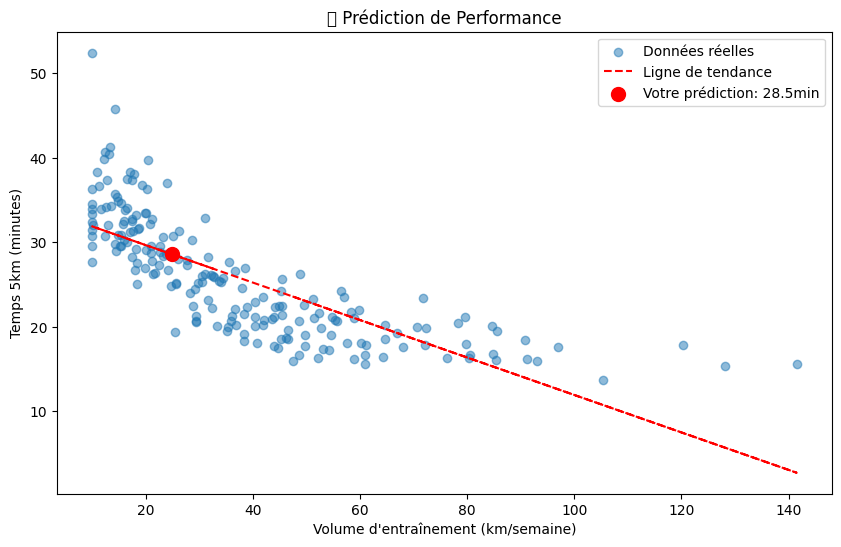

In [10]:
# 3. Prédiction simple basée sur le volume d'entraînement
import numpy as np

# Régression linéaire simple
x = runners_df['km_semaine']
y = runners_df['temps_5km']
coeffs = np.polyfit(x, y, 1)
poly_func = np.poly1d(coeffs)

# Prédire votre temps selon votre volume
mon_volume = 25  # km par semaine
temps_predit = poly_func(mon_volume)
print(f"🎯 Avec {mon_volume}km/semaine, votre temps 5km prédit: {temps_predit:.1f} minutes")

# Graphique de la prédiction
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Données réelles')
plt.plot(x, poly_func(x), 'r--', label='Ligne de tendance')
plt.scatter([mon_volume], [temps_predit], color='red', s=100, 
           label=f'Votre prédiction: {temps_predit:.1f}min')
plt.xlabel('Volume d\'entraînement (km/semaine)')
plt.ylabel('Temps 5km (minutes)')
plt.title('🎯 Prédiction de Performance')
plt.legend()
plt.show()

/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


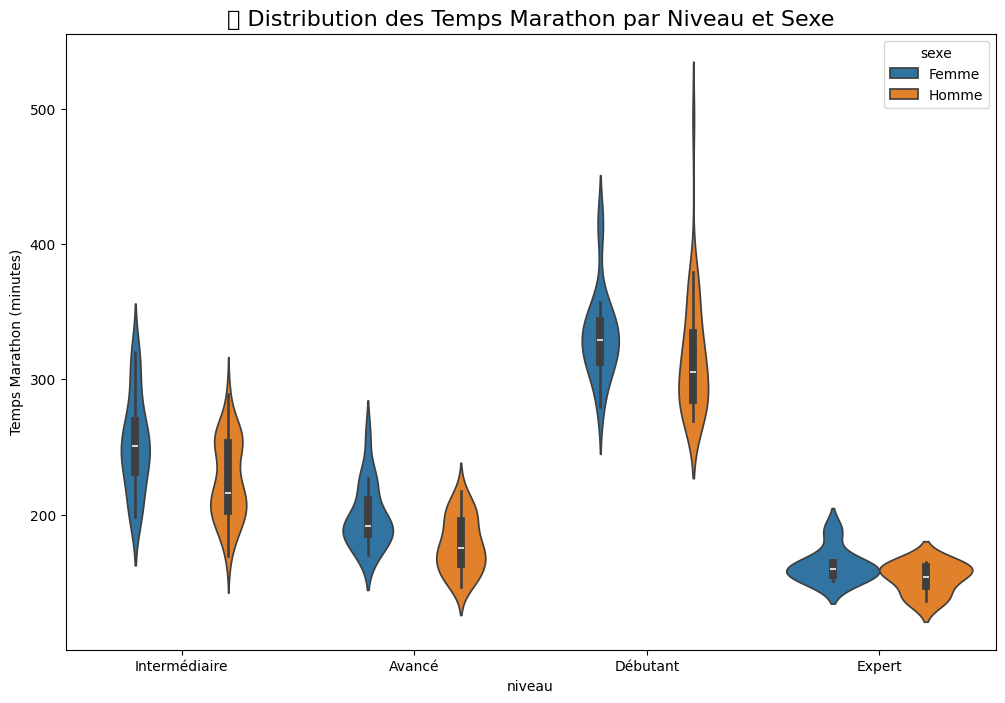

In [11]:
# 1. Graphique en violon stylé
plt.figure(figsize=(12, 8))
sns.violinplot(data=runners_df, x='niveau', y='temps_marathon', hue='sexe')
plt.title('🎻 Distribution des Temps Marathon par Niveau et Sexe', fontsize=16)
plt.ylabel('Temps Marathon (minutes)')
plt.show()

/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


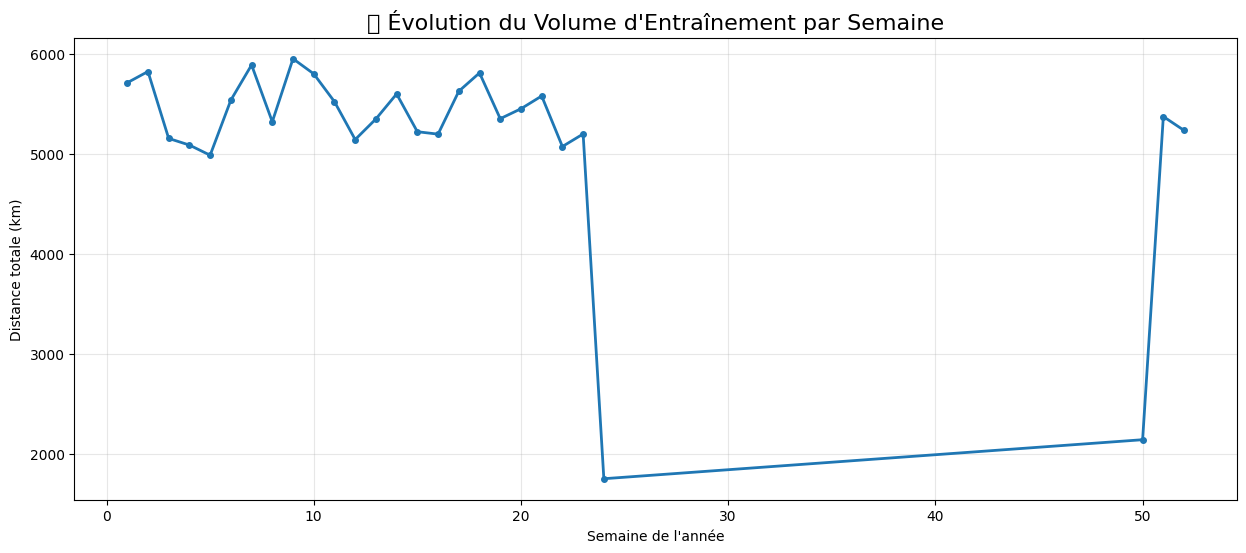

In [12]:
# 2. Graphique temporel des séances
sessions_df['date'] = pd.to_datetime(sessions_df['date'])
sessions_df['semaine'] = sessions_df['date'].dt.isocalendar().week

volume_hebdo = sessions_df.groupby('semaine')['distance'].sum()

plt.figure(figsize=(15, 6))
volume_hebdo.plot(kind='line', marker='o', linewidth=2, markersize=4)
plt.title('📈 Évolution du Volume d\'Entraînement par Semaine', fontsize=16)
plt.xlabel('Semaine de l\'année')
plt.ylabel('Distance totale (km)')
plt.grid(True, alpha=0.3)
plt.show()

/home/pimsras3/Documents/learn/running_predicteur/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127939 (\N{RUNNER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


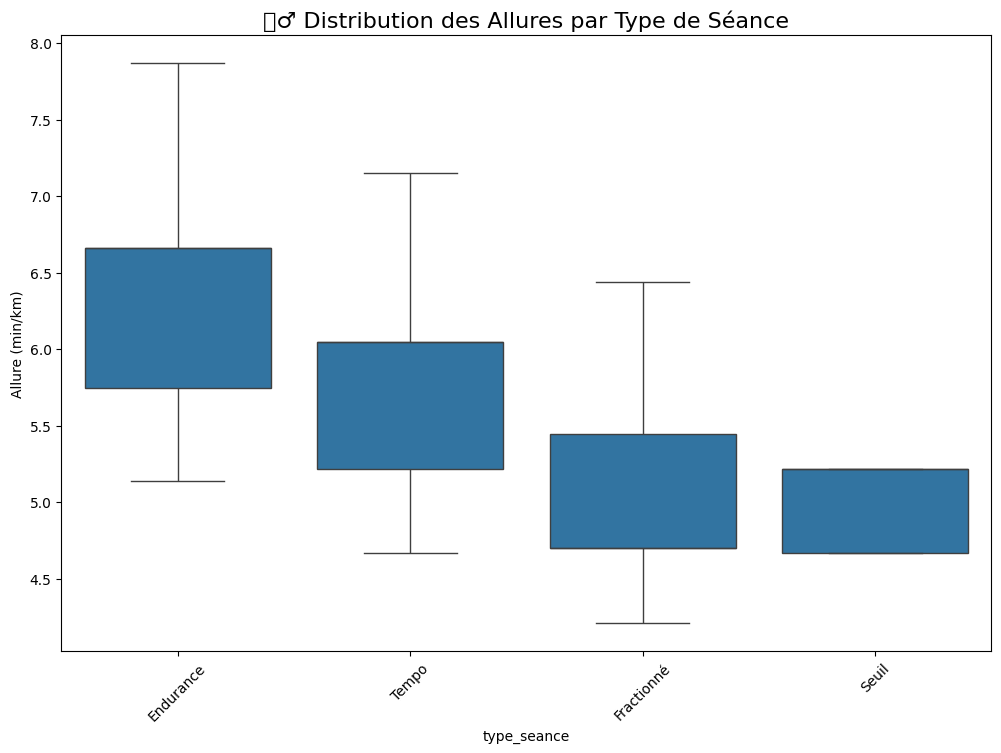

In [13]:
# 3. Analyse des allures par type de séance
plt.figure(figsize=(12, 8))
sns.boxplot(data=sessions_df, x='type_seance', y='allure')
plt.title('🏃‍♂️ Distribution des Allures par Type de Séance', fontsize=16)
plt.ylabel('Allure (min/km)')
plt.xticks(rotation=45)
plt.show()

In [14]:
# 1. Défi: Trouvez le coureur le plus polyvalent
runners_df['ecart_performances'] = (
    runners_df[['temps_5km', 'temps_10km', 'temps_semi', 'temps_marathon']].std(axis=1)
)
coureur_polyvalent = runners_df.loc[runners_df['ecart_performances'].idxmin()]
print("🏅 COUREUR LE PLUS POLYVALENT:")
print(f"ID: {coureur_polyvalent['runner_id']}")
print(f"Niveau: {coureur_polyvalent['niveau']}")
print(f"Écart-type des performances: {coureur_polyvalent['ecart_performances']:.2f}")

🏅 COUREUR LE PLUS POLYVALENT:
ID: R016
Niveau: Expert
Écart-type des performances: 54.43


In [15]:
# 2. Défi: Créez votre propre score de performance
def calculer_score_performance(row):
    # Score basé sur l'inverse des temps (plus rapide = meilleur score)
    score_5km = 100 / row['temps_5km']
    score_10km = 200 / row['temps_10km']
    score_semi = 500 / row['temps_semi']
    score_marathon = 1000 / row['temps_marathon']
    return (score_5km + score_10km + score_semi + score_marathon) / 4

runners_df['score_performance'] = runners_df.apply(calculer_score_performance, axis=1)
top_performers = runners_df.nlargest(10, 'score_performance')[['runner_id', 'niveau', 'score_performance']]
print("🏆 TOP 10 SELON NOTRE SCORE PERSONNALISÉ:")
print(top_performers)

🏆 TOP 10 SELON NOTRE SCORE PERSONNALISÉ:
    runner_id  niveau  score_performance
15       R016  Expert           7.262104
84       R085  Expert           6.770805
83       R084  Avancé           6.585788
2        R003  Avancé           6.493668
41       R042  Expert           6.439563
170      R171  Expert           6.433419
199      R200  Avancé           6.402503
64       R065  Avancé           6.371599
133      R134  Expert           6.300635
58       R059  Expert           6.293126


In [16]:
# Installation si nécessaire
# !pip install ipywidgets

from ipywidgets import interact, IntSlider

@interact(age=IntSlider(min=18, max=70, value=30),
          volume=IntSlider(min=10, max=100, value=30))
def analyser_profil(age, volume):
    profil_similaire = runners_df[
        (runners_df['age'].between(age-3, age+3)) & 
        (runners_df['km_semaine'].between(volume-5, volume+5))
    ]
    if len(profil_similaire) > 0:
        temps_moyen = profil_similaire['temps_5km'].mean()
        print(f"🎯 Temps 5km prédit pour {age} ans et {volume}km/sem: {temps_moyen:.1f} min")
    else:
        print("❌ Aucun profil similaire trouvé")

interactive(children=(IntSlider(value=30, description='age', max=70, min=18), IntSlider(value=30, description=…

📊 Analyse pour Homme Intermédiaire (25-50 ans):
   Nombre: 43 coureurs
   Temps 5km moyen: 23.6 min
   Volume moyen: 33.3 km/sem


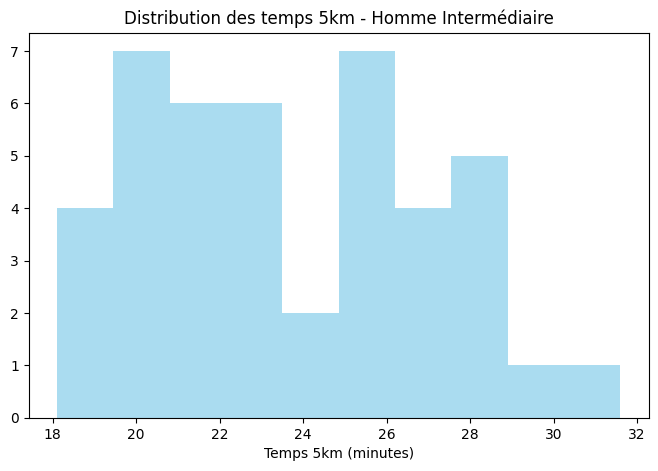

In [20]:
# Fonction pour analyser n'importe quelle combinaison
def analyser_combinaison(sexe, niveau, age_min, age_max):
    subset = runners_df[
        (runners_df['sexe'] == sexe) & 
        (runners_df['niveau'] == niveau) & 
        (runners_df['age'].between(age_min, age_max))
    ]
    
    if len(subset) > 0:
        print(f"📊 Analyse pour {sexe} {niveau} ({age_min}-{age_max} ans):")
        print(f"   Nombre: {len(subset)} coureurs")
        print(f"   Temps 5km moyen: {subset['temps_5km'].mean():.1f} min")
        print(f"   Volume moyen: {subset['km_semaine'].mean():.1f} km/sem")
        
        # Mini graphique
        plt.figure(figsize=(8, 5))
        plt.hist(subset['temps_5km'], bins=10, alpha=0.7, color='skyblue')
        plt.title(f'Distribution des temps 5km - {sexe} {niveau}')
        plt.xlabel('Temps 5km (minutes)')
        plt.show()
    else:
        print("❌ Aucun coureur trouvé avec ces critères")

# Exemple d'utilisation
analyser_combinaison('Homme', 'Intermédiaire', 25, 50)